# Analisys
Now that we have a clean data set we will use it to prove (or disprove) the following hypothesis:

### 1. USA is the most fatal country, only because it is the one with most data
### 2. Swimming is the deadliest activity
### 3. More men die of shark attacks than women
### 4. Most people that die in a shark attack are between 35-40 years old

But first, lets look at the data we have:

In [157]:
%run -i 'src/analysis.py'

data = pd.read_csv('data/clean_attacks.csv')

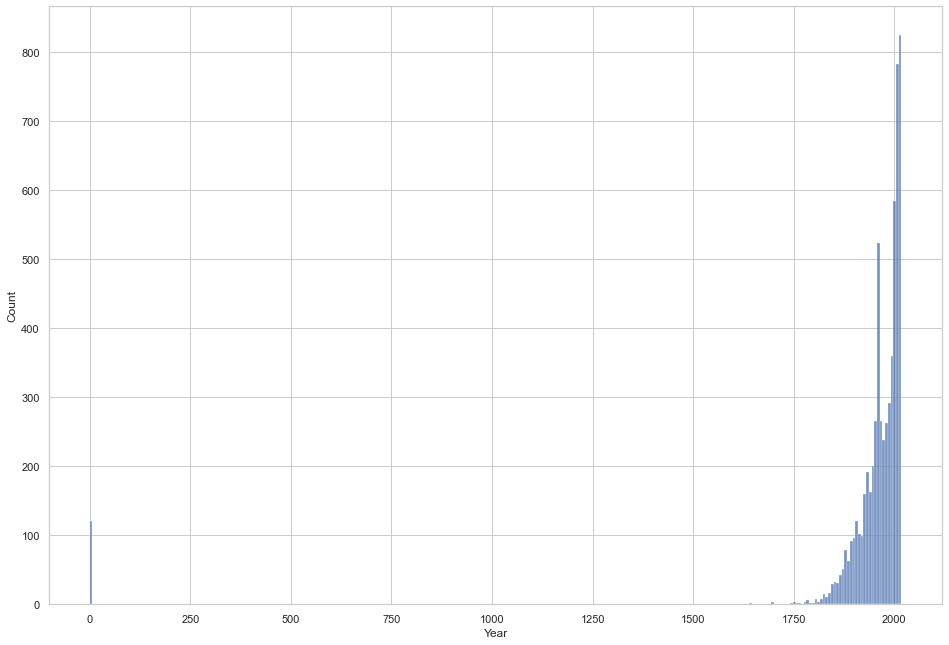

In [158]:
sns.histplot(x=data.Year);

We can see that we have around 100 cases with year "0" and fewer than 200 cases since before 1900. Lets get rid of those and center our hypothesis after 1900.

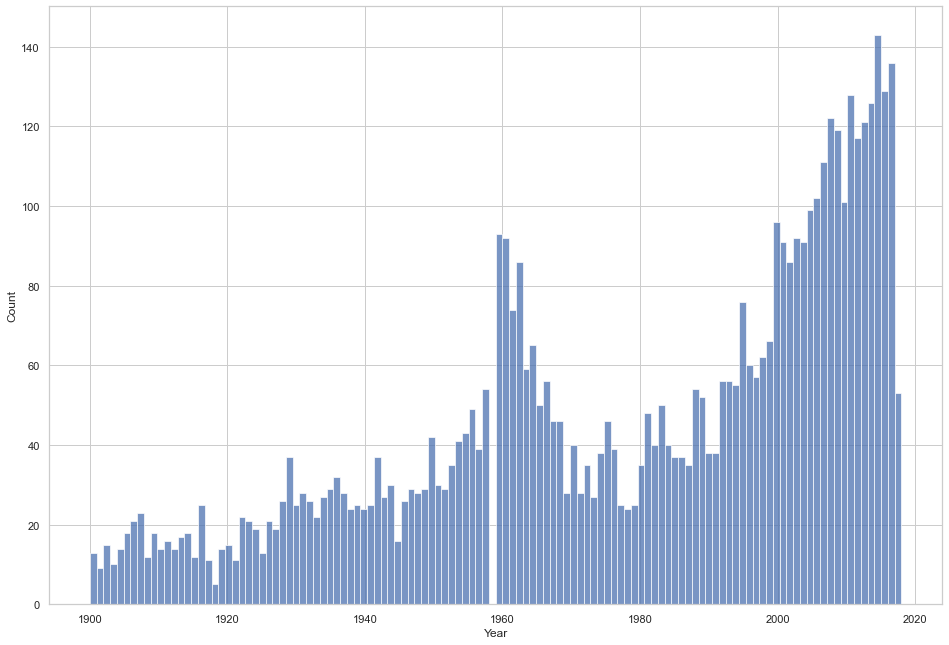

In [159]:
data = data.drop(data[data.Year<1900].index)
sns.histplot(x=data.Year, bins=120);

Much better, we can see that we have fewer than 40 cases reported before 1950. But we will keep this date range for our analysis.

## Hypothesis 1: USA is the most fatal country, only because it is the one with most data

For this hypothesis we will create a new dataframe, dropping the cases where the country was not reported.

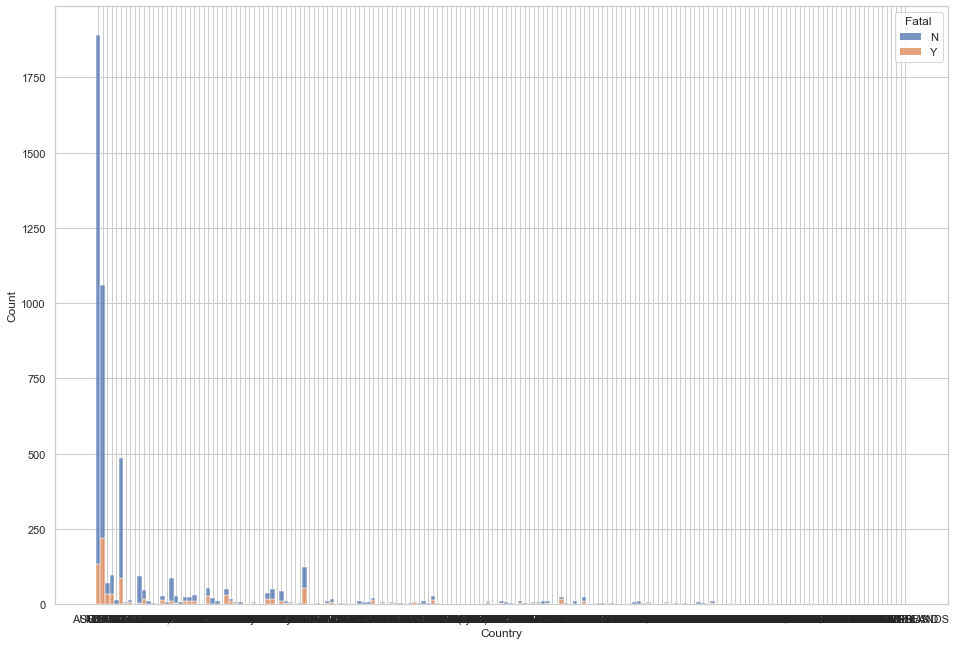

In [160]:
data1 = data
data1 = data1.dropna(subset=["Country"])
sns.histplot(data=data1, x="Country", hue="Fatal", multiple="stack");

Clearly we have a few countries with many reported cases and a lot of countries with less than 100 cases reported in almost 120 years of data. Lets keep the top reporting countries.

In [161]:
top_20_hip_1 = list(data1["Country"].value_counts().head(20).keys())
data1 = data1[data1["Country"].isin(top_20_hip_1)]

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
 [Text(0, 0, 'USA'),
  Text(1, 0, 'AUSTRALIA'),
  Text(2, 0, 'MEXICO'),
  Text(3, 0, 'BRAZIL'),
  Text(4, 0, 'SOUTH AFRICA'),
  Text(5, 0, 'BAHAMAS'),
  Text(6, 0, 'NEW CALEDONIA'),
  Text(7, 0, 'CUBA'),
  Text(8, 0, 'NEW ZEALAND'),
  Text(9, 0, 'SPAIN'),
  Text(10, 0, 'JAPAN'),
  Text(11, 0, 'EGYPT'),
  Text(12, 0, 'REUNION'),
  Text(13, 0, 'PHILIPPINES'),
  Text(14, 0, 'MOZAMBIQUE'),
  Text(15, 0, 'FIJI'),
  Text(16, 0, 'ITALY'),
  Text(17, 0, 'PAPUA NEW GUINEA'),
  Text(18, 0, 'CROATIA'),
  Text(19, 0, 'PANAMA')])

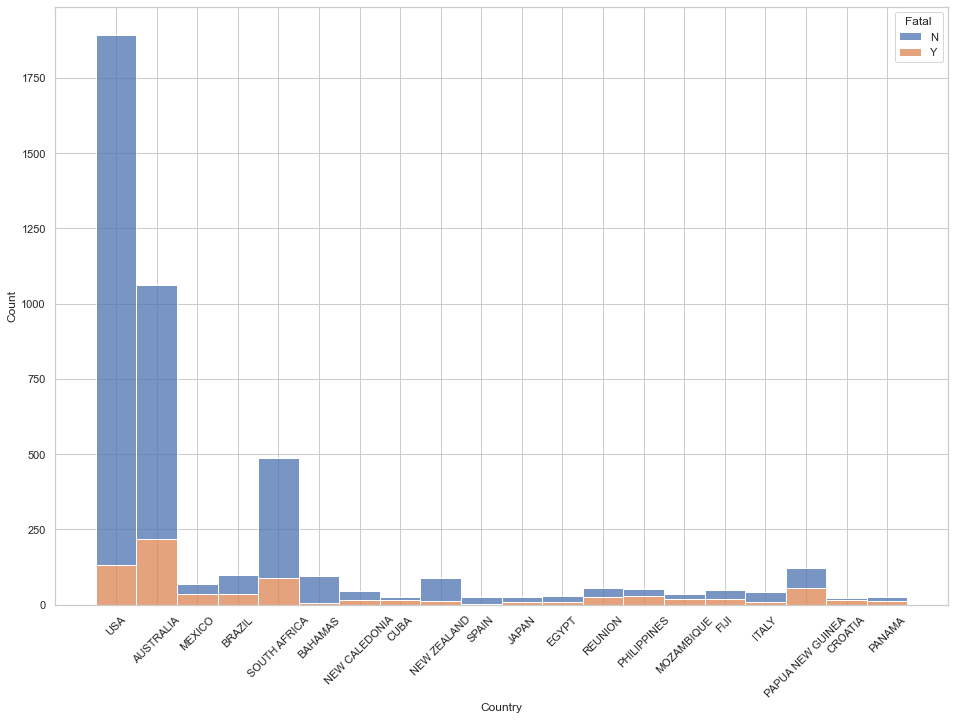

In [162]:
sns.histplot(data=data1, x="Country", hue="Fatal", multiple="stack");
plt.xticks(rotation=45)

Our hypothesis is not looking great. The US is indeed the country with the most cases reported. However, Australia, has more fatal cases with less total cases. Lets do the math and find out:

In [163]:
the_math = pd.DataFrame(data1[["Country","Fatal","Case Number"]].groupby(["Country","Fatal"]).count()).unstack("Fatal")
the_math.set_axis(the_math.columns.map('_'.join),axis=1,inplace=True)
the_math = the_math.reset_index()
the_math.rename(columns={"Case Number_N" : "N", "Case Number_Y" : "Y"},inplace=True)
the_math["Fatality"] = the_math.apply(lambda x: ((x["Y"])/(x["Y"]+x["N"])), axis=1)
the_math.sort_values("Fatality",ascending=False).reset_index()


,index,Country,N,Y,Fatality
0,3,CROATIA,8,14,0.636364
1,15,PHILIPPINES,21,30,0.588235
2,4,CUBA,13,14,0.518519
3,9,MEXICO,34,35,0.507246
4,13,PANAMA,13,13,0.500000
5,10,MOZAMBIQUE,19,18,0.486486
6,16,REUNION,29,26,0.472727
7,14,PAPUA NEW GUINEA,69,54,0.439024
8,8,JAPAN,15,10,0.400000
9,6,FIJI,31,18,0.367347


Surprisingly, the country with the highest fatality is croatina, where 63% of cases reported resulted in death. Papua New Guinea is the most fatal country with more than 100 cases reported, with a fatality of 43.9%. Of the initiall suspects, the USA turned out to be one of the safest countries, with 6.9% Fatallity. Australia, which was our second suspect after seeing the graph, truned out to be 14th on the list, with a fatality rate of 20.6%.

Lets move on to our second hypothesis:

## 2. Swimming is the deadliest activity

Again, we will create a new data set for this hypothesis, keeping only values where the field "Activity was correctly filled"

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'fishing'),
  Text(1, 0, 'others'),
  Text(2, 0, 'sailing'),
  Text(3, 0, 'surfing'),
  Text(4, 0, 'swimming')])

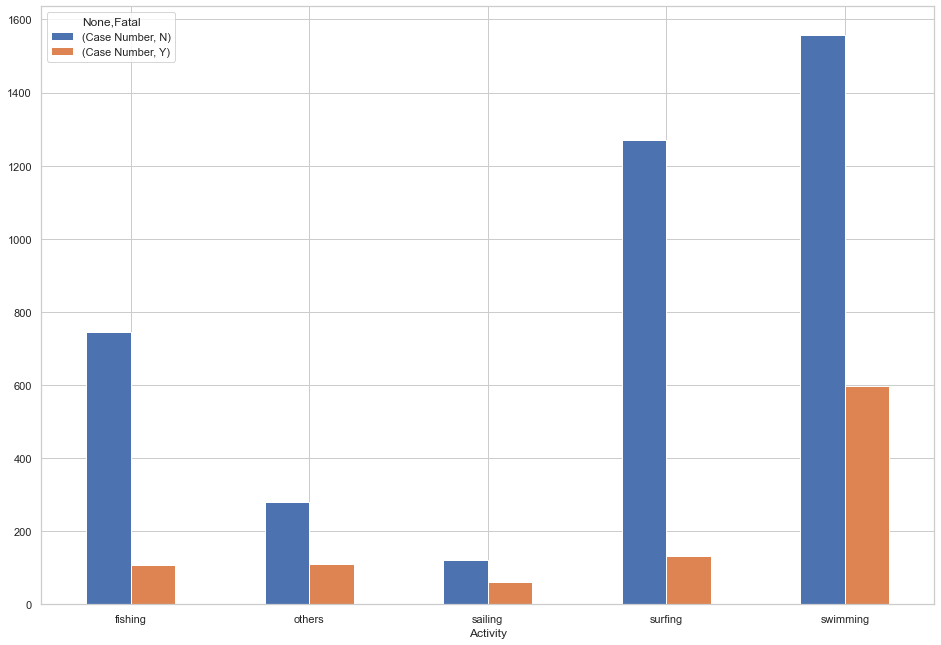

In [164]:
data2 = data
data2 = data2.dropna(subset=["Activity"])
swimming = pd.DataFrame(data2.groupby(["Activity","Fatal"])["Case Number"].count()).unstack()
swimming.plot(kind="bar");
plt.xticks(rotation=0)

Swimming clearly is the most popular activity, since it has most of the cases reported, but is it the deadliest? Again, lets do the math:

In [165]:
the_swimming_math = pd.DataFrame(data2[["Activity","Fatal","Case Number"]].groupby(["Activity","Fatal"]).count()).unstack('Fatal')
the_swimming_math.set_axis(the_swimming_math.columns.map('_'.join),axis=1,inplace=True)
the_swimming_math = the_swimming_math.reset_index()
the_swimming_math.rename(columns={"Case Number_N" : "N", "Case Number_Y" : "Y"},inplace=True)
the_swimming_math["Fatality"] = the_swimming_math.apply(lambda x: ((x["Y"])/(x["Y"]+x["N"])), axis=1)
the_swimming_math.sort_values("Fatality",ascending=False).reset_index()

,index,Activity,N,Y,Fatality
0,2,sailing,121,62,0.338798
1,1,others,281,109,0.279487
2,4,swimming,1558,598,0.277365
3,0,fishing,745,108,0.126612
4,3,surfing,1270,132,0.094151


Again we are surprised. Swimming turned out to be the third most fatal activity with a fataility rate of 28%. While sailing, with much less cases reported, has a fatality rate of 33.8%.

Lets keep going:

## 3. More men die of shark attacks than women
gain, we will create a new data set for this hypothesis, keeping only values where the field "Sex" was correctly filled

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, '.'),
  Text(1, 0, 'F'),
  Text(2, 0, 'M'),
  Text(3, 0, 'M '),
  Text(4, 0, 'N'),
  Text(5, 0, 'lli')])

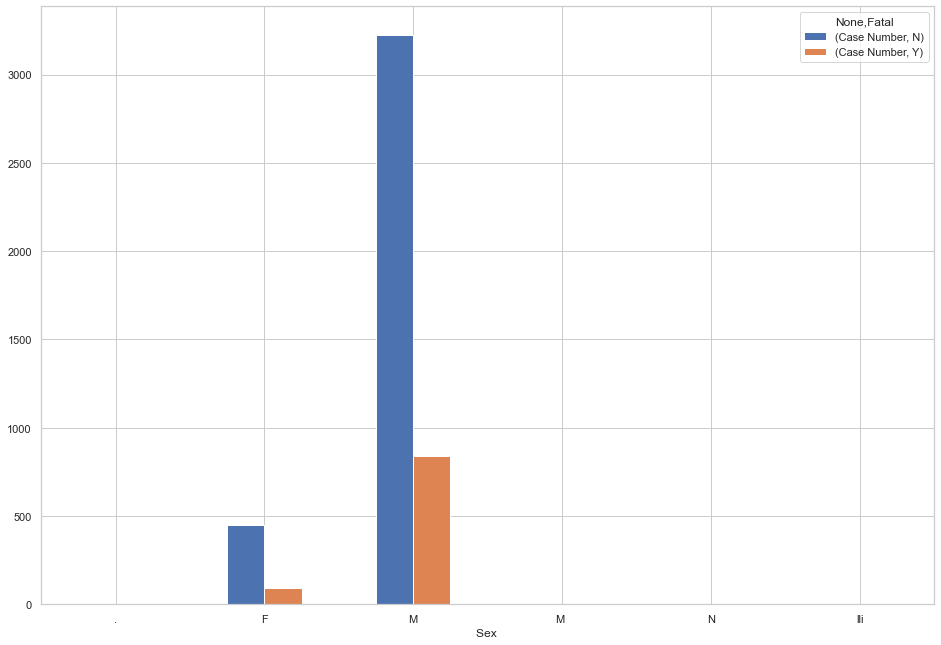

In [171]:
data3 = data
data3 = data3.dropna(subset=["Sex "])
swimming = pd.DataFrame(data2.groupby(["Sex ","Fatal"])["Case Number"].count()).unstack("Fatal")
swimming.plot(kind="bar");
plt.xticks(rotation=0)

Suspicous... It seems men have more deaths, but lets do the math... again:

In [172]:
the_gender_math = pd.DataFrame(data2[["Sex ","Fatal","Case Number"]].groupby(["Sex ","Fatal"]).count()).unstack('Fatal')
the_gender_math.set_axis(the_gender_math.columns.map('_'.join),axis=1,inplace=True)
the_gender_math = the_gender_math.reset_index()
the_gender_math.rename(columns={"Case Number_N" : "N", "Case Number_Y" : "Y"},inplace=True)
the_gender_math["Fatality"] = the_gender_math.apply(lambda x: ((x["Y"])/(x["Y"]+x["N"])), axis=1)
the_gender_math.sort_values("Fatality",ascending=False).reset_index()

,index,Sex,N,Y,Fatality
0,2,M,3225.0,840.0,0.206642
1,1,F,448.0,92.0,0.170370
2,0,.,NaN,1.0,NaN
3,3,M,2.0,NaN,NaN
4,4,N,1.0,NaN,NaN
5,5,lli,1.0,NaN,NaN


This time we were correct! There is some data cleaning issues, we have 4 values with wrong genders. But for the genders entered correctly, shark attacks to men resulted in death 